In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

target_spot=glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Target spot edited\*.jpg")
powdery_mildew= glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Powdery Mildew Edited|*jpg")
healthy_leaf=glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Healthy leaf edited\*.jpg")
bacterial_blight=glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Bacterial Blight edited\*.jpg")
army_worm=glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Army worm edited\*.jpg")
aphids=glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Cotton Plant Disease Dataset-transfer\Cotton plant disease\Cotton plant disease\Aphids edited\*.jpg")

In [3]:
classes={0:'target_spot', 1:'powdery_mildew', 2:'healthy_leaf', 3:'bacterial_blight', 4:'army_worm', 5:'aphids'}

In [4]:
images=[]
labels=[]

for i in target_spot:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in powdery_mildew:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in healthy_leaf:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

for i in bacterial_blight:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

for i in army_worm:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)

for i in aphids:
    img=plt.imread(i)
    images.append(img)
    labels.append(5)




In [5]:
from sklearn.utils import shuffle
images,labels=shuffle(images,labels,random_state=100)

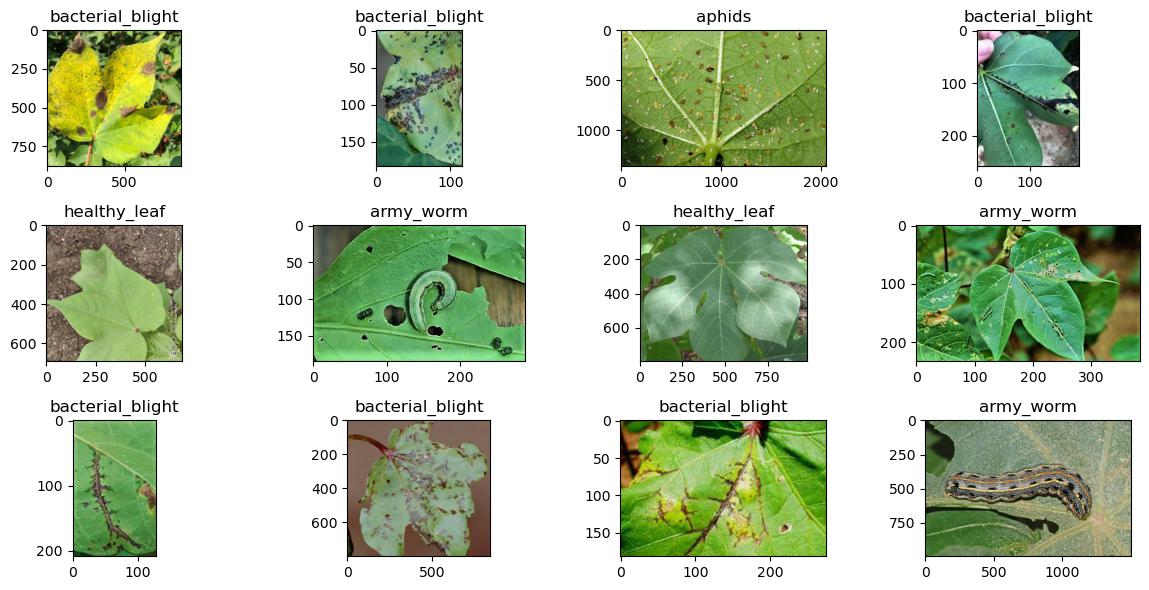

In [6]:
plt.figure(figsize=(12,6))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])

plt.tight_layout()


In [7]:
for i in range (10):
    print(images[i].shape)

(881, 869, 3)
(184, 116, 3)
(1360, 2048, 3)
(259, 194, 3)
(691, 691, 3)
(185, 288, 3)
(798, 983, 3)
(233, 384, 3)
(209, 128, 3)
(800, 842, 3)


In [8]:
from skimage.transform import resize

X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

X=np.array(X)

y=np.array(labels)



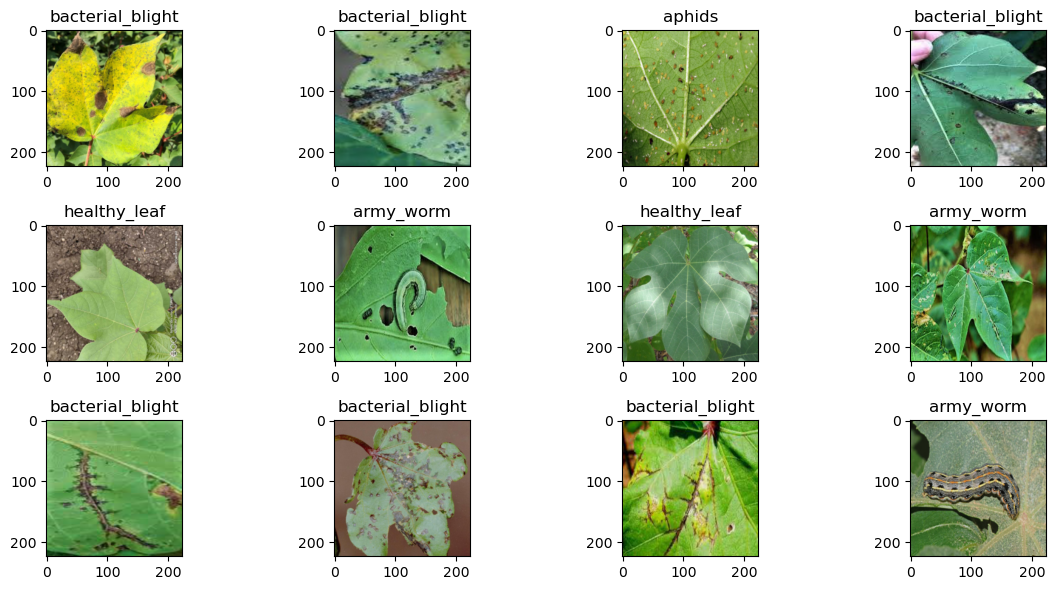

In [9]:
plt.figure(figsize=(12,6))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    plt.title(classes[y[i]])

plt.tight_layout()


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
!pip install tensorflow-hub

In [12]:
pip install --upgrade tensorflow tensorflow-hub


In [13]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-hub

In [14]:
'''import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf

num_of_classes = 6

# Define the input tensor directly
input_layer = tf.keras.Input(shape=(224, 224, 3))

# Define the feature extraction model from TensorFlow Hub
feature_extractor_model = hub.KerasLayer(
    'https://tfhub.dev/google/mobilenet_v2/feature_vector/4',
    trainable=False
)

# Pass input through the feature extractor model
x = feature_extractor_model(input_layer)  # Pass input through the layer

# Add custom layers on top
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(14, activation='relu')(x)
# Define the output layer
x = Dense(num_of_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
'''

"import tensorflow_hub as hub\nfrom tensorflow.keras.layers import Dense, Dropout, Input\nfrom tensorflow.keras.models import Model\nimport tensorflow as tf\n\nnum_of_classes = 6\n\n# Define the input tensor directly\ninput_layer = tf.keras.Input(shape=(224, 224, 3))\n\n# Define the feature extraction model from TensorFlow Hub\nfeature_extractor_model = hub.KerasLayer(\n    'https://tfhub.dev/google/mobilenet_v2/feature_vector/4',\n    trainable=False\n)\n\n# Pass input through the feature extractor model\nx = feature_extractor_model(input_layer)  # Pass input through the layer\n\n# Add custom layers on top\nx = Dense(64, activation='relu')(x)\nx = Dropout(0.1)(x)\nx = Dense(14, activation='relu')(x)\n# Define the output layer\nx = Dense(num_of_classes, activation='softmax')(x)\n\n# Create the final model\nmodel = Model(inputs=input_layer, outputs=x)\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\n"

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

num_of_classes = 6

# Define the input tensor
input_layer = tf.keras.Input(shape=(224, 224, 3))

# Load MobileNetV2 model pre-trained on ImageNet (exclude the top classification layer)
mobilenet_v2_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the MobileNetV2 model
mobilenet_v2_model.trainable = False

# Pass the input through the pre-trained model
x = mobilenet_v2_model(input_layer)

# Flatten the output of the MobileNetV2 model
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add custom layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(14, activation='relu')(x)

# Define the output layer
x = Dense(num_of_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.2883 - loss: 1.6507 - val_accuracy: 0.4286 - val_loss: 1.1825
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4929 - loss: 1.2128 - val_accuracy: 0.4286 - val_loss: 0.9670
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6842 - loss: 0.9570 - val_accuracy: 1.0000 - val_loss: 0.6558
Epoch 4/10
3/5 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8108 - loss: 0.6496

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:
y_pred

In [ ]:
plt.figure(figsize=(12,6))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(classes[y_pred[i]])

plt.tight_layout()


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(f"Accuracy is : {accuracy_score(y_test,y_pred)}")

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

print(classification_report(y_test,y_pred))